In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataframe = pd.read_pickle("/content/drive/MyDrive/datasets/porto_seguro.pickle")

In [4]:
dataframe.shape

(595212, 59)

In [5]:
dataframe.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [6]:
pd.set_option('display.max_columns', None)
dataframe.sample(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
414450,1035930,0,1,2,1,1,6,0,0,1,0,0,0,0,0,0,6,1,0,0,0.4,0.0,1.372042,8,1,-1,2,0,11,1,1,0,1,94,0,0.374166,0.816973,0.430116,3.605551,0.4,0.0,0.9,2,1,8,4,11,2,6,5,1,2,10,0,0,1,0,1,0
532472,1330599,0,1,1,9,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,1.6,2.280899,11,0,1,0,1,11,1,1,2,1,3,2,0.424264,1.102730,0.378946,3.464102,0.2,0.9,0.8,2,3,9,6,9,2,9,9,3,5,6,0,0,0,1,1,1
135883,339572,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.4,0.2,0.605186,11,1,0,0,1,11,1,1,2,1,53,2,0.447214,0.806943,0.357071,3.162278,0.1,0.6,0.4,5,0,9,1,8,1,12,2,0,0,9,0,0,1,0,1,0
373693,934044,0,1,1,4,0,0,0,0,1,0,0,0,0,0,0,4,1,0,0,0.2,0.2,-1.000000,10,0,-1,0,1,15,1,1,0,1,5,2,0.424264,0.813573,0.395854,2.645751,0.0,0.0,0.5,1,3,5,4,9,5,7,3,4,2,6,0,1,1,1,0,0
585296,1463030,0,4,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.1,0.2,-1.000000,10,1,-1,0,1,0,1,1,0,1,104,0,0.422019,0.420694,0.389872,0.000000,0.5,0.5,0.7,1,0,9,3,12,4,9,3,1,1,6,1,1,0,1,0,0


In [7]:
X_full = dataframe.drop('target', 1)
y_full = dataframe.iloc[:, 1]

In [8]:
X, X_holdout, y, y_holdout = train_test_split(X_full, y_full, 
                                                    test_size = 0.1, random_state=42)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size = 0.1, random_state=42)

In [10]:
# import pickle

# dataset_dict = {"X_train": X_train, "X_val": X_val, "X_holdout": X_holdout, "y_train": y_train, "y_val": y_val, "y_holdout": y_holdout}

# with open('/content/drive/MyDrive/datasets/ps_split_data_dict.pickle', 'wb') as file:
#     pickle.dump(dataset_dict, file)

In [11]:
%run /content/drive/MyDrive/Colab\ Notebooks/common_functions.ipynb

In [12]:
lr = LogisticRegression()

fit_and_score(lr, X_train, y_train, X_val, y_val)

Recall: 0.000 
Precision: 0.000
F1: 0.000 
Accuracy: 0.963 
ROC AUC: 0.488


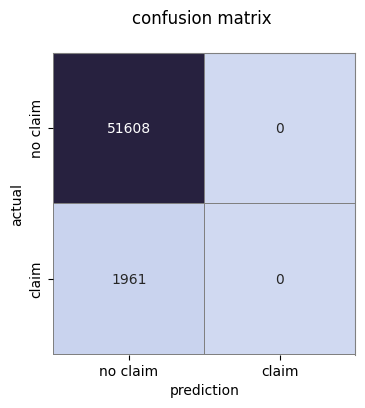

In [13]:
confusion_diagram(X_val, y_val, lr)

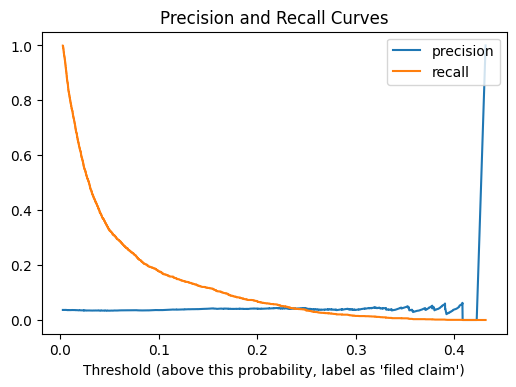

In [14]:
precision_recall_diagram(X_val, y_val, lr)

ROC AUC score =  0.4880150237806503


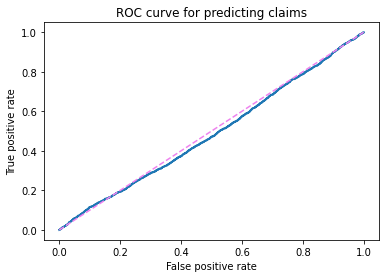

In [15]:
roc_diagram(X_val, y_val, lr)

In [16]:
with open('/content/drive/MyDrive/datasets/ps_reduced_features_dict.pickle', 'rb') as file:
    data_dict2 = pickle.load(file)

X2_lite = data_dict2["X2_lite"]
y2 = data_dict2["y2"]  

In [17]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2_lite, y2, 
                                                    test_size = 0.2, random_state=42)

In [18]:
X_val2.shape

(88707, 15)

In [19]:
lr2 = LogisticRegression()

fit_and_score(lr2, X_train2, y_train2, X_val2, y_val2)

Recall: 0.000 
Precision: 0.000
F1: 0.000 
Accuracy: 0.963 
ROC AUC: 0.495


In [20]:
import imblearn.over_sampling

In [21]:
n_pos = np.sum(y_train == 1)
n_pos

17514

In [22]:
n_neg = np.sum(y_train == 0)
n_neg

464607

In [23]:
ratio = {1 : n_pos * 4, 0 : n_neg} 

ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 

X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

In [24]:
lr3 = LogisticRegression()
fit_and_score(lr3, X_train_rs, y_train_rs, X_val, y_val)

Recall: 0.000 
Precision: 0.000
F1: 0.000 
Accuracy: 0.963 
ROC AUC: 0.495


In [25]:
ratio2 = {1 : n_pos * 10, 0 : n_neg} 

ROS2 = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio2, random_state=42)

X_train_rs2, y_train_rs2 = ROS2.fit_resample(X_train, y_train)

In [26]:
lr4 = LogisticRegression()
fit_and_score(lr4, X_train_rs2, y_train_rs2, X_val, y_val)

Recall: 0.000 
Precision: 0.000
F1: 0.000 
Accuracy: 0.963 
ROC AUC: 0.488


In [27]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [28]:
lr5 = LogisticRegression()
fit_and_score(lr5, X_train_smote, y_train_smote, X_val, y_val)

Recall: 0.000 
Precision: 0.000
F1: 0.000 
Accuracy: 0.963 
ROC AUC: 0.495


In [29]:
lr6 = LogisticRegression(solver='liblinear') 

fit_and_score(lr6, X_train, y_train, X_val, y_val)

Recall: 0.000 
Precision: 0.000
F1: 0.000 
Accuracy: 0.963 
ROC AUC: 0.488


In [30]:
lr_4x_weighted = LogisticRegression(class_weight={1 : 4, 0 : 1}, solver='liblinear')

fit_and_score(lr_4x_weighted, X_train, y_train, X_val, y_val)

Recall: 0.000 
Precision: 0.000
F1: 0.000 
Accuracy: 0.963 
ROC AUC: 0.488


Best F1 score 0.071 at prob decision threshold >= 0.054


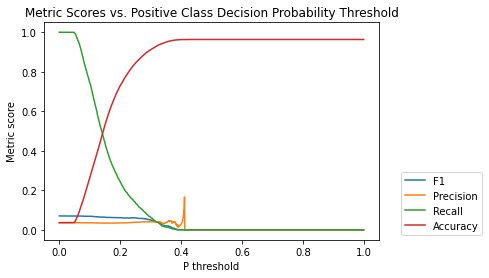

In [31]:
threshold_diagram(X_val, y_val, lr_4x_weighted)

In [32]:
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')

fit_and_score(lr_balanced, X_train, y_train, X_val, y_val)

Recall: 0.550 
Precision: 0.053
F1: 0.096 
Accuracy: 0.622 
ROC AUC: 0.623


Percent claims in predicted no claim group: 2.67% 
Percent claims in predicted claim group: 5.27% 

Av payout per low risk member: $186.60 
    Av payout per high risk member: $369.09 

Total Policies: 53569.00 
Total Claims: 1961.00 
Overall Percent claims 3.66%


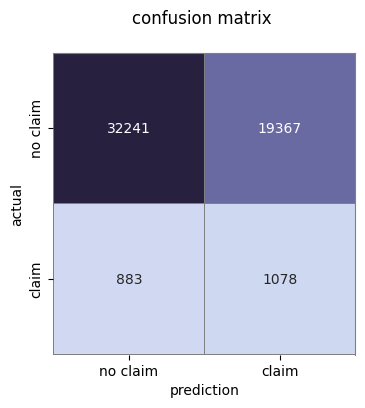

In [33]:
confusion_diagram(X_val, y_val, lr_balanced)

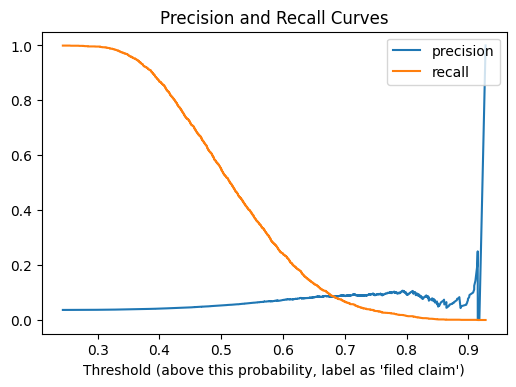

In [34]:
precision_recall_diagram(X_val, y_val, lr_balanced)

ROC AUC score =  0.6226389601096756


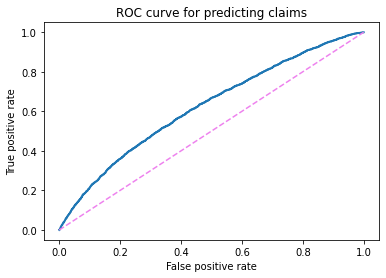

In [35]:
roc_diagram(X_val, y_val, lr_balanced)

In [36]:
score(lr_balanced, X_holdout, y_holdout)

Recall: 0.547 
Precision: 0.054
F1: 0.098 
Accuracy: 0.625 
ROC AUC: 0.621


Percent claims in predicted no claim group: 2.72% 
Percent claims in predicted claim group: 5.39% 

Av payout per low risk member: $190.25 
    Av payout per high risk member: $377.24 

Total Policies: 59522.00 
Total Claims: 2219.00 
Overall Percent claims 3.73%


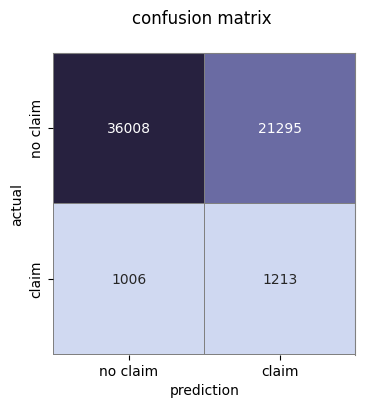

In [37]:
confusion_diagram(X_holdout, y_holdout, lr_balanced)

ROC AUC score =  0.621292738771517


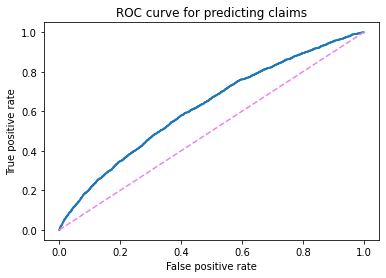

In [38]:
roc_diagram(X_holdout, y_holdout, lr_balanced)

In [39]:
import warnings
warnings.filterwarnings("ignore")

Best F1 score 0.113 at prob decision threshold >= 0.605


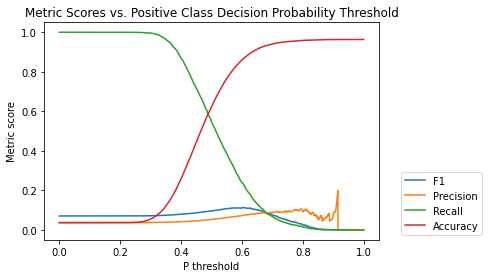

In [40]:
threshold_diagram(X_val, y_val, lr_balanced)

In [41]:
eval_gini(y_val, lr_balanced.predict_proba(X_val)[:,1])

0.24527792021935102

In [42]:
with open('/content/drive/MyDrive/datasets/lr_balanced.pickle', 'wb') as file:
    pickle.dump(lr_balanced, file)